In [ ]:
analysis → feature engineering → model → web app

✅ All libraries imported successfully!


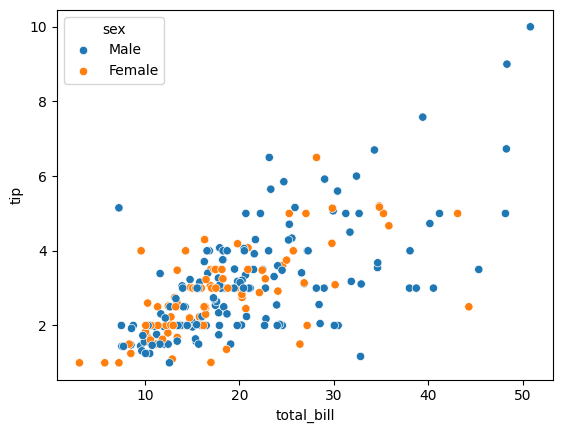

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# simple check
print("✅ All libraries imported successfully!")

tips = sns.load_dataset("tips")
sns.scatterplot(x="total_bill", y="tip", data=tips, hue="sex")
plt.show()


In [5]:
pd.set_option("display.max_columns", None)

In [6]:
sns.set_style("whitegrid")

In [7]:
df = pd.read_csv("german_credit_data.csv")

In [8]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [12]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [14]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [22]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df["Job"].unique

<bound method Series.unique of 0      2
1      2
2      1
3      2
4      2
      ..
995    1
996    3
997    2
998    2
999    2
Name: Job, Length: 1000, dtype: int64>

In [23]:
df.duplicated().sum()

np.int64(0)

In [26]:
df = df.dropna().reset_index(drop=True)

In [27]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [29]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [30]:
df.drop(columns = 'Unnamed: 0' , inplace = True)

In [32]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

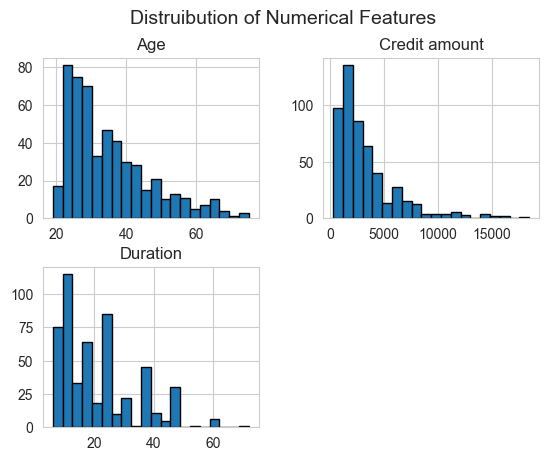

In [34]:
df[["Age", "Credit amount","Duration"]].hist(bins = 20, edgecolor = "black")
plt.suptitle("Distruibution of Numerical Features", fontsize = 14)
plt.show()

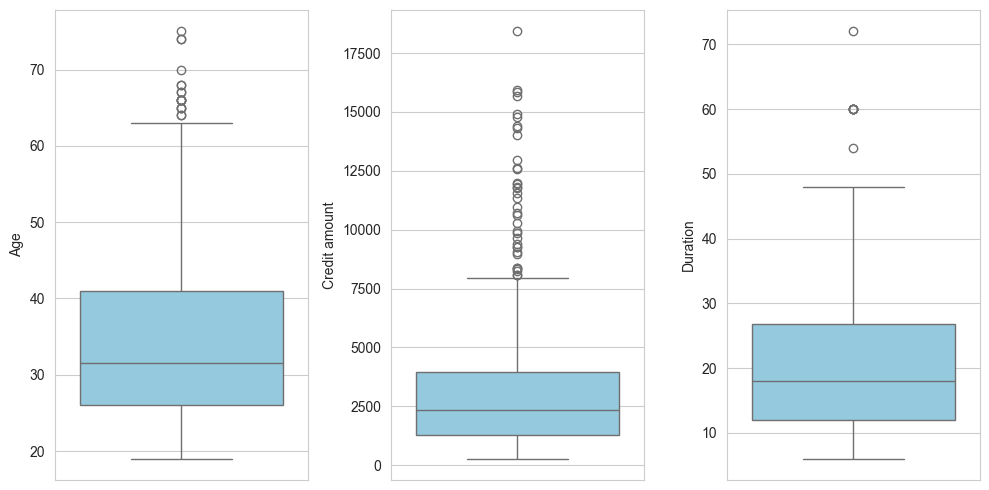

In [35]:
plt.figure(figsize= (10,5))
for i , col in enumerate(["Age","Credit amount", "Duration"]):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y = df[col], color = "skyblue")
    
plt.tight_layout()
plt.show()

In [37]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [41]:
categorical_cols = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4932\1105990031.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4932\1105990031.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4932\1105990031.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
C:\U

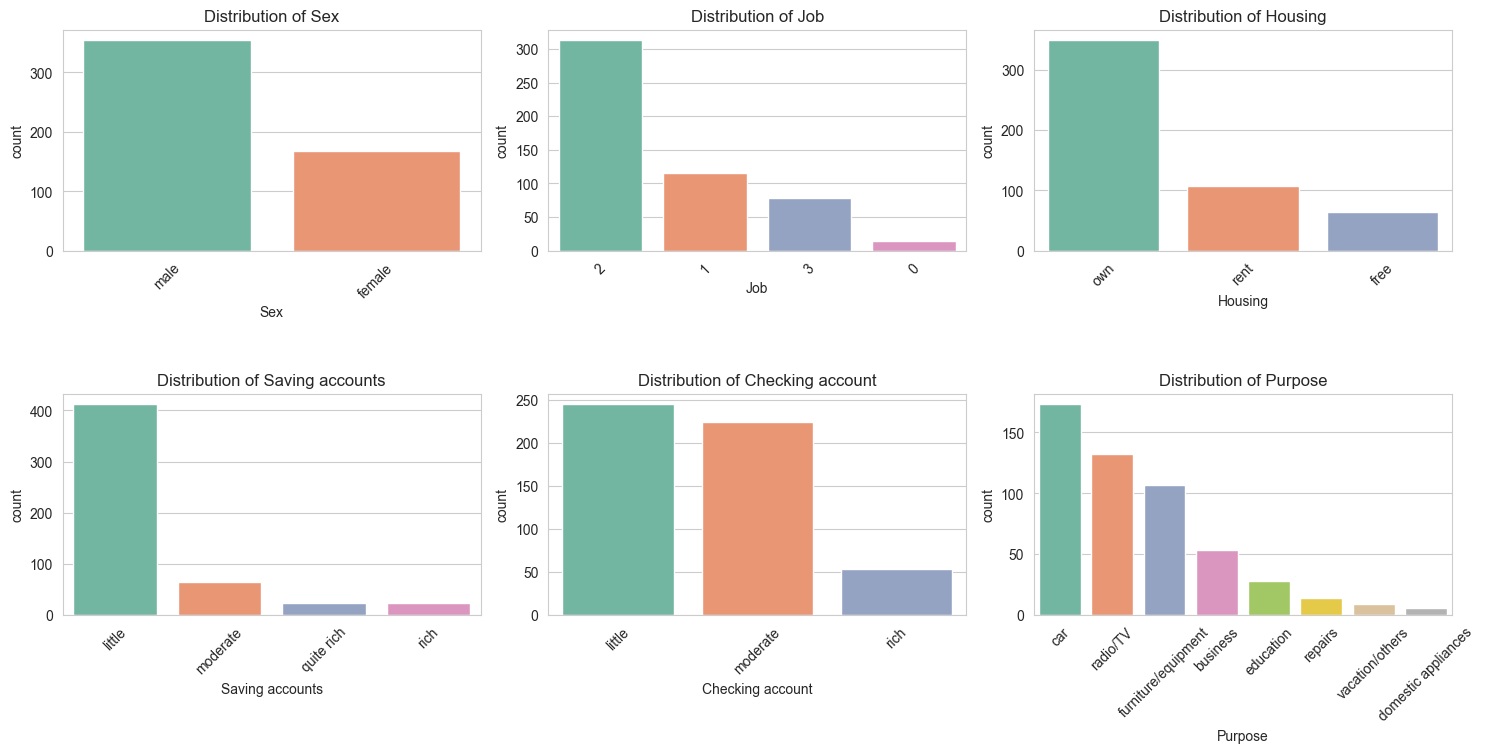

In [43]:
plt.figure(figsize= (15,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [44]:
corr = df[["Age","Job","Credit amount","Duration"]].corr()

In [45]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


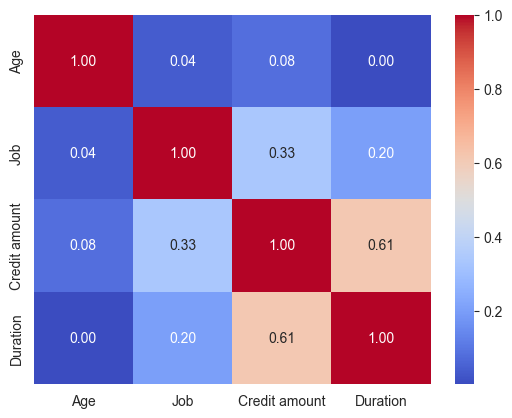

In [46]:
sns.heatmap(corr, annot= True, cmap = "coolwarm", fmt= ".2f")
plt.show()

In [47]:
df.groupby("Job")["Credit amount"].mean()


Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [48]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [51]:
# Pivot table: average credit amount by Housing and Purpose
df.pivot_table(values="Credit amount", index="Housing", columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


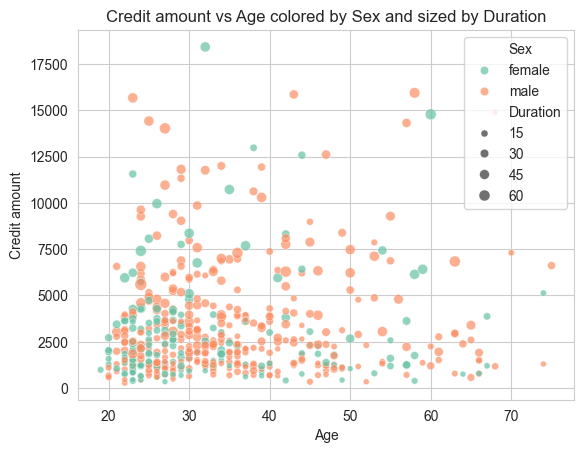

In [53]:
sns.scatterplot(
    data=df, 
    x="Age", 
    y="Credit amount", 
    hue="Sex", 
    size="Duration", 
    alpha=0.7, 
    palette="Set2"   # ✅ valid palette
)
plt.title("Credit amount vs Age colored by Sex and sized by Duration")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4932\3073259789.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


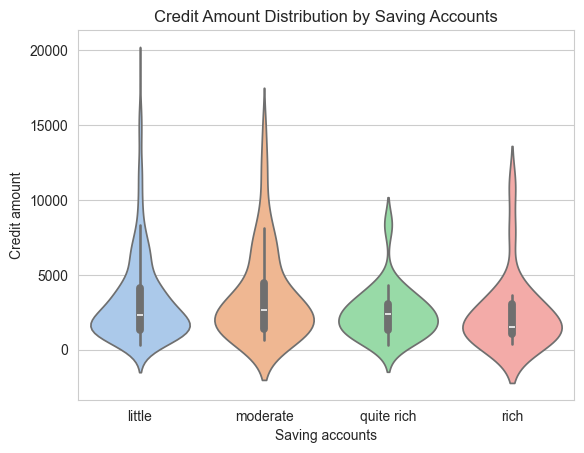

In [55]:
sns.violinplot(
    data=df,
    x="Saving accounts",
    y="Credit amount",
    palette="pastel"   # ✅ corrected here
)
plt.title("Credit Amount Distribution by Saving Accounts")
plt.show()


In [56]:
df["Risk"].value_counts(normalize= True) * 100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

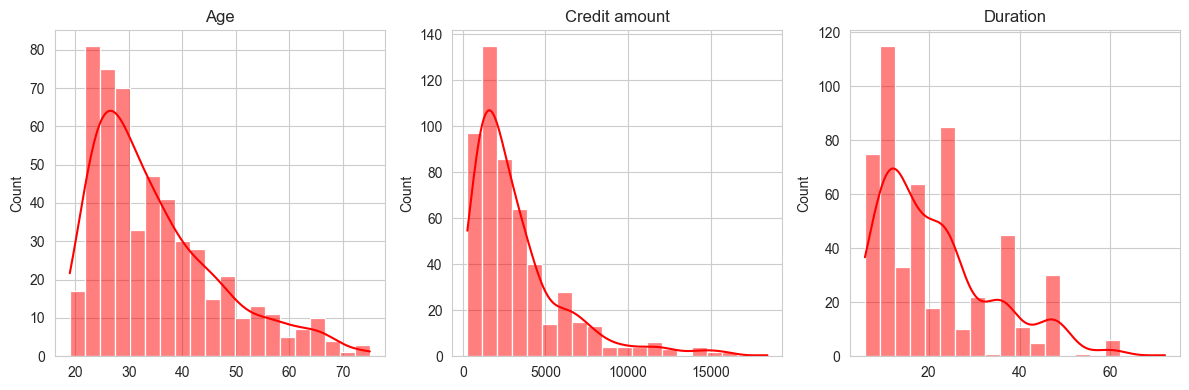

In [59]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], bins=20, kde=True, color="red")
    plt.title(col)
    plt.xlabel("")

plt.tight_layout()
plt.show()

In [60]:
df.groupby("Risk")[["Age","Credit amount","Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [61]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

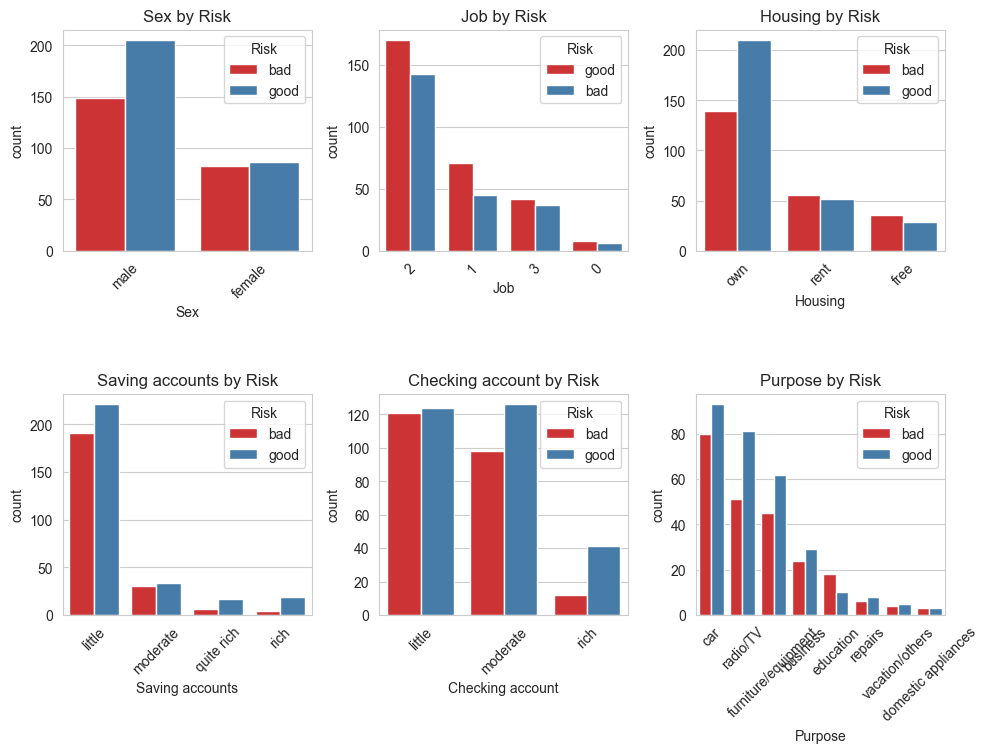

In [65]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(
        data=df,
        x=col,
        hue="Risk",
        palette="Set1",
        order=df[col].value_counts().index   # ✅ fixed here
    )
    plt.title(f"{col} by Risk")              # ✅ fixed here
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [66]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [67]:
# feature names (ensure these match df.columns)
features = ["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account", "Credit amount", "Duration"]

In [68]:
target = "Risk"

In [90]:
# Create df_model robustly: if some features are missing, add them as NaN
required_cols = features + [target]
available = [c for c in required_cols if c in df.columns]
missing_cols = [c for c in required_cols if c not in df.columns]
if missing_cols:
    print("Warning: missing columns (they will be added as NaN):", missing_cols)
    print("Available columns found in df:", available)
# Start with available columns
df_model = df[[c for c in required_cols if c in df.columns]].copy()
# Add any missing columns with NaN and ensure column order
for c in missing_cols:
    df_model[c] = np.nan
df_model = df_model[required_cols]
print("df_model created with shape:", df_model.shape)

Available columns found in df: ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Risk']
df_model created with shape: (522, 9)


In [76]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Durations,Risk
0,22,female,2,own,little,moderate,5951,NaN,bad
1,45,male,2,free,little,little,7882,NaN,good
2,53,male,2,free,little,little,4870,NaN,bad
3,35,male,3,rent,little,moderate,6948,NaN,good
4,28,male,3,own,little,moderate,5234,NaN,bad


In [77]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [78]:
cat_cols = df_model.select_dtypes(include = "object").columns.drop("Risk")

In [79]:
le_dict = {}

In [80]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [81]:
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")

In [91]:
le_target = LabelEncoder()

In [83]:
target

'Risk'

In [109]:
df_model[target] = le_target.fit_transform(df_model[target])

In [85]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [92]:
joblib.dump(le_target, "target_encoder.pkl")

['target_encoder.pkl']

In [93]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Durations,Risk
0,22,female,2,own,little,moderate,5951,NaN,bad
1,45,male,2,free,little,little,7882,NaN,good
2,53,male,2,free,little,little,4870,NaN,bad
3,35,male,3,rent,little,moderate,6948,NaN,good
4,28,male,3,own,little,moderate,5234,NaN,bad


In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x = df_model.drop(target, axis =1)

In [96]:
y = df_model[target]

In [97]:
x

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Durations
0,22,female,2,own,little,moderate,5951,NaN
1,45,male,2,free,little,little,7882,NaN
2,53,male,2,free,little,little,4870,NaN
3,35,male,3,rent,little,moderate,6948,NaN
4,28,male,3,own,little,moderate,5234,NaN
...,...,...,...,...,...,...,...,...
517,48,male,1,own,little,moderate,1743,NaN
518,30,male,3,own,little,little,3959,NaN
519,40,male,3,own,little,little,3857,NaN
520,23,male,2,free,little,little,1845,NaN


In [98]:
y

0       bad
1      good
2       bad
3      good
4       bad
       ... 
517    good
518    good
519    good
520     bad
521    good
Name: Risk, Length: 522, dtype: object

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)

In [102]:
X_train.shape

(417, 8)

In [103]:
X_test.shape

(105, 8)

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [105]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
    # Initialize GridSearchCV
    grid = GridSearchCV(
        model,
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    # Train the model
    grid.fit(X_train, y_train)
    
    # Select best estimator
    best_model = grid.best_estimator_
    
    # Predict on test set
    y_prediction = best_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_prediction)
    
    return best_model, accuracy, grid.best_params_

In [106]:
dt_model = DecisionTreeClassifier(random_state=1, class_weight='balanced')
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import joblib


In [115]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

# Encode categorical columns
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

print("✅ Encoding complete! All columns are now numeric.")


Categorical columns: ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']
✅ Encoding complete! All columns are now numeric.


In [131]:
# Prepare features and target safely
target = "Risk"  # ensure this is the correct target column
# Show available columns for quick sanity check
print('df columns:', df.columns.tolist())
# Create X and y from the dataframe
X = df.drop(columns=[target])
y = df[target].copy()

# Diagnostic: show a few unique values and dtype
print('y dtype:', y.dtype)
print('y unique sample:', y.unique()[:10])

# If y contains non-numeric labels (strings), encode it with LabelEncoder
from sklearn.preprocessing import LabelEncoder
import joblib
if y.dtype == object or y.dtype == 'O' or y.apply(lambda v: isinstance(v, str)).any():
    le_target = LabelEncoder()
    y = le_target.fit_transform(y.astype(str))
    joblib.dump(le_target, 'target_encoder.pkl')
    print('Target encoded and saved to target_encoder.pkl. Classes:', le_target.classes_)

# Final checks before splitting
import numpy as np
print('y unique after encoding (sample):', np.unique(y)[:10])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Split done. X_train shape:', X_train.shape, 'y_train shape:', y_train.shape)

df columns: ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk']
y dtype: int64
y unique sample: [0 1]
y unique after encoding (sample): [0 1]
Split done. X_train shape: (417, 9) y_train shape: (417,)


In [117]:
best_dt, acc_dt, params_dt = train_model(dt_model, dt_param_grid, X_train, y_train, X_test, y_test)


In [2]:
# Safely print Decision Tree accuracy if available
if 'acc_dt' in globals():
    try:
        print("Decision Tree Accuracy:", acc_dt)
    except Exception as e:
        print("Error printing acc_dt:", e)
else:
    print("acc_dt is not defined. Run the training cell that calls train_model to produce acc_dt.")

acc_dt is not defined. Run the training cell that calls train_model to produce acc_dt.


In [119]:
print("✅ Best Decision Tree Parameters:", params_dt)

✅ Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [120]:
print("🎯 Test Accuracy:", round(acc_dt * 100, 2), "%")

🎯 Test Accuracy: 53.33 %


In [121]:
joblib.dump(best_dt, "decision_tree_model.pkl")

['decision_tree_model.pkl']

In [122]:
import joblib

# Save model (example with DecisionTree)
joblib.dump(best_dt, "extra_trees_credit_model.pickle")
print("✅ Model saved as extra_trees_credit_model.pickle")


✅ Model saved as extra_trees_credit_model.pickle


In [123]:
from sklearn.preprocessing import LabelEncoder
import joblib

categorical_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le
    joblib.dump(le, f"{col}_encoder.pickle")  # ✅ save each encoder

print("✅ All encoders saved successfully!")


✅ All encoders saved successfully!
